In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable

## 

# Regression Metrics 

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|true_i-pred_i|
$$

In [2]:
def mae(y_true, y_pred):
        return sum([abs(y1 - y2) for y1, y2 in zip(y_true, y_pred)]) / len(y_true)

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(true_i-pred_i)^2
$$

In [3]:
def mse(y_true, y_pred):
        return sum([pow(y1 - y2, 2) for y1, y2 in zip(y_true, y_pred)]) / len(y_true)

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(true_i-pred_i)^2}
$$

In [4]:
def rmse(y_true, y_pred):
        return math.sqrt(sum([pow(y1 - y2, 2) for y1, y2 in zip(y_true, y_pred)]) / len(y_true))

$$
MAPE = \frac{100}{n}\sum_{i=1}^{n}|\frac {true_i-pred_i}{true_i}|
$$

In [5]:
def mape(y_true, y_pred):
        return sum([abs((y1 - y2) / y1) for y1, y2 in zip(y_true, y_pred)]) * 100 / len(y_true)

## Regression Tests

### Test 1

In [6]:
y_true  = [1, 2, 3, 4]
y_pred  = [1, 2, 3, 4]

print("MAE: ",mae(y_true, y_pred))
print("MSE: ",mse(y_true, y_pred))
print("RMSE:",rmse(y_true, y_pred))
print("MAPE:",mape(y_true, y_pred))

MAE:  0.0
MSE:  0.0
RMSE: 0.0
MAPE: 0.0


### Test 2

In [7]:
y_true  = [1, 2, 3, 4]
y_pred  = [1, 2.5, 3, 5]

print("MAE: ",mae(y_true, y_pred))
print("MSE: ",mse(y_true, y_pred))
print("RMSE:",rmse(y_true, y_pred))
print("MAPE:",mape(y_true, y_pred))

MAE:  0.375
MSE:  0.3125
RMSE: 0.5590169943749475
MAPE: 12.5


##  

# Classification Metrics 

$$
Confusion \ Matrix
$$

In [8]:
def confusion_matrix(y_true, y_pred, Print = False):
    label  = len(np.unique(y_true))
    matrix = np.zeros((label, label), dtype=np.int32)
    result = []
    
    for y1,y2 in zip(y_true, y_pred):
        matrix[y1, y2] += 1
    
    for x in range(label):
        tp = matrix[x,x]
        fn = sum(matrix[x,:]) - tp
        fp = sum(matrix[:,x]) - tp
        tn = matrix.sum() - (tp + fn + fp)
        result.append([tp, fn, fp, tn])
        
    if Print:
        df_cm = pd.DataFrame(matrix, range(label), range(label))
        f, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
        plt.title("Confusion Matrix")
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')
        plt.show()
        
    return result #retorna a confusion matrix de cada classe

$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN} 
$$

In [9]:
def accuracy(y_true, y_pred):
    result = confusion_matrix(y_true, y_pred)
    tp = 0; fn = 0; fp = 0; tn = 0
    for x in range(len(result)):
        tp += result[x][0]        
        fn += result[x][1]        
        fp += result[x][2]        
        tn += result[x][3]
    print("\nAccuracy = ", (tp + tn)/(tp + tn + fp + fn))

$$
Precision = \frac{TP}{TP + FP} \ \ \ Recall = \frac{TP}{TP + FN} \ \ \ F1 = \frac{2PR}{P+R} \\ (by \ class)
$$

In [10]:
def byClass(y_true, y_pred):
    result = confusion_matrix(y_true, y_pred)
    tp = 0; fn = 0; fp = 0; tn = 0
    table = PrettyTable(['', 'Precision', 'Recall', "F1"])
    for x in range(len(result)):
        tp += result[x][0]        
        fn += result[x][1]        
        fp += result[x][2]
        precis = (tp/(tp+fp))
        recall = (tp/(tp+fn))
        f1 = ((2*precis*recall) / (precis + recall))
        table.add_row(['Class {0}'.format(x), "%.2f" % precis , "%.2f" % recall, "%.2f" % f1])
    print(table)

$$
MacroF1 = \frac{2P'R'}{P'+ R'}
$$

In [11]:
def macrof1(y_true, y_pred):
    result = confusion_matrix(y_true, y_pred)
    recall = []
    precis = []
    for x in range(len(result)):
        tp = result[x][0]        
        fn = result[x][1]        
        fp = result[x][2]
        recall.append((tp/(tp+fn)))
        precis.append((tp/(tp+fp)))
    averageP = np.average(precis)
    averageR = np.average(recall)
    print("MacroF1  = ", (2*averageP*averageR)/(averageP + averageR))

$$
MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$

In [12]:
def mcc(y_true, y_pred):
    result = confusion_matrix(y_true, y_pred)
    tp = 0; fn = 0; fp = 0; tn = 0
    for x in range(len(result)):
        tp += result[x][0]        
        fn += result[x][1]        
        fp += result[x][2]        
        tn += result[x][3]
    mcc = (tp * tn - fp * fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print("MCC \t = ", mcc)

## Classification Tests

### Teste 1

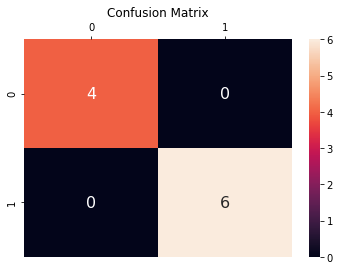

+---------+-----------+--------+------+
|         | Precision | Recall |  F1  |
+---------+-----------+--------+------+
| Class 0 |    1.00   |  1.00  | 1.00 |
| Class 1 |    1.00   |  1.00  | 1.00 |
+---------+-----------+--------+------+

Accuracy =  1.0
MacroF1  =  1.0
MCC 	 =  1.0


In [13]:
y_true = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]
y_pred = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]

confusion_matrix(y_true, y_pred, True)
byClass(y_true, y_pred)
accuracy(y_true, y_pred)
macrof1(y_true, y_pred)
mcc(y_true, y_pred)

### Test 2

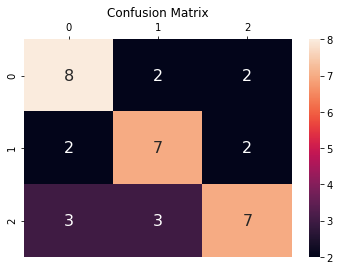

+---------+-----------+--------+------+
|         | Precision | Recall |  F1  |
+---------+-----------+--------+------+
| Class 0 |    0.62   |  0.67  | 0.64 |
| Class 1 |    0.60   |  0.65  | 0.63 |
| Class 2 |    0.61   |  0.61  | 0.61 |
+---------+-----------+--------+------+

Accuracy =  0.7407407407407407
MacroF1  =  0.6127603750047877
MCC 	 =  0.4166666666666667


In [14]:
y_true = [1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0]
y_pred = [1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0]

confusion_matrix(y_true, y_pred, True)
byClass(y_true, y_pred)
accuracy(y_true, y_pred)
macrof1(y_true, y_pred)
mcc(y_true, y_pred)